In [23]:
import pandas as pd
import numpy as np

df=pd.read_excel('movie_dataSet_2023.xlsx')
print(df)

                           movie   language               director  Action  \
0                          Jawan      Hindi                  Atlee       1   
1                        Pathaan      Hindi        Siddharth Anand       1   
2                         Animal      Hindi    Sandeep Reddy Vanga       1   
3                        Gadar 2      Hindi            Anil Sharma       1   
4    Salaar: Cease Fire - Part 1     Telugu         Prashanth Neel       1   
..                           ...        ...                    ...     ...   
133                    Runway 34      Hindi             Ajay Devgn       0   
134    Vendhu Thanindhathu Kaadu      Tamil  Gautham Vasudev Menon       1   
135                 Malikappuram  Malayalam    Vishnu Sasi Shankar       1   
136   Rocketry: The Nambi Effect      Tamil               Madhavan       0   
137               Jana Gana Mana  Malayalam       Dijo Jose Antony       0   

     Drama  Musical  Adventure  Thriller  Crime  Comedy  ...  A

In [24]:
x=df.iloc[:,1:27].values
y=df.iloc[:,-1].values



In [25]:

print(x)



[['Hindi' 'Atlee' 1 ... 285 169 129.6]
 ['Hindi' 'Siddharth Anand' 1 ... 250 146 104.8]
 ['Hindi' 'Sandeep Reddy Vanga' 1 ... 140 204 115.9]
 ...
 ['Malayalam' 'Vishnu Sasi Shankar' 1 ... 10 121 36.1]
 ['Tamil' 'Madhavan' 0 ... 50 157 35.7]
 ['Malayalam' 'Dijo Jose Antony' 0 ... 15 162 27.1]]


In [26]:
print(y)

['Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Flop' 'Hit' 'Hit'
 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit'
 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Flop' 'Hit' 'Hit' 'Flop' 'Hit'
 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Flop' 'Hit' 'Hit'
 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Flop' 'Hit' 'Hit' 'Flop' 'Hit' 'Hit'
 'Flop' 'Hit' 'Flop' 'Hit' 'Hit' 'Flop' 'Flop' 'Flop' 'Hit' 'Hit' 'Flop'
 'Flop' 'Flop' 'Hit' 'Flop' 'Hit' 'Hit' 'Flop' 'Flop' 'Hit' 'Hit' 'Flop'
 'Hit' 'Flop' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Hit' 'Hit'
 'Hit' 'Hit' 'Flop' 'Hit' 'Flop' 'Flop' 'Flop' 'Flop' 'Flop' 'Flop' 'Flop'
 'Hit' 'Hit' 'Hit' 'Flop' 'Flop' 'Flop' 'Flop' 'Hit' 'Hit' 'Hit' 'Hit'
 'Flop' 'Hit' 'Flop' 'Flop' 'Flop' 'Hit' 'Flop' 'Hit' 'Flop' 'Hit' 'Flop'
 'Flop' 'Flop' 'Hit' 'Hit' 'Flop' 'Hit' 'Hit' 'Hit' 'Flop' 'Hit' 'Hit'
 'Flop' 'Hit']


In [27]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn.compose import ColumnTransformer

# # Assuming these are the column indices you want to encode
# columns_to_encode = [0, 1]

# # Preprocess non-numeric columns with LabelEncoder
# label_encoders = {}
# for col in columns_to_encode:
#     label_encoders[col] = LabelEncoder()
#     x[:, col] = label_encoders[col].fit_transform(x[:, col])

# # Apply ColumnTransformer with OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

# x = ct.fit_transform(x)


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x[:,0]=le.fit_transform(x[:,0])
x[:,1]=le.fit_transform(x[:,1])
x[:,19]=le.fit_transform(x[:,19])
x[:,20]=le.fit_transform(x[:,20])
x[:,21]=le.fit_transform(x[:,21])
x[:,22]=le.fit_transform(x[:,22])


In [29]:
print(x)

[[1 18 1 ... 285 169 129.6]
 [1 108 1 ... 250 146 104.8]
 [1 102 1 ... 140 204 115.9]
 ...
 [3 127 1 ... 10 121 36.1]
 [6 60 0 ... 50 157 35.7]
 [3 28 0 ... 15 162 27.1]]


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [31]:
from cmath import inf
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

#dt = DecisionTreeClassifier(criterion='gini',random_state=0)
dt=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)




#K-NN metics
#{'haversine', 'correlation', 'manhattan', 'braycurtis', 'chebyshev', 'precomputed', 'rogerstanimoto', 'nan_euclidean', 'sqeuclidean', 'cityblock', 'l2', 'infinity', 'dice', 'p', 'euclidean', 'seuclidean', 'sokalsneath', 'jaccard', 'minkowski', 'mahalanobis', 'yule', 'sokalmichener', 'pyfunc', 'cosine', 'hamming', 'l1', 'russellrao', 'canberra'}


In [32]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)


In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(precision_score(y_test,y_pred, average='weighted'))

0.7380952380952381
[[ 7  6]
 [ 5 24]]
              precision    recall  f1-score   support

        Flop       0.58      0.54      0.56        13
         Hit       0.80      0.83      0.81        29

    accuracy                           0.74        42
   macro avg       0.69      0.68      0.69        42
weighted avg       0.73      0.74      0.74        42

0.7329365079365081


In [44]:
from sklearn.metrics import auc,roc_curve
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_encoded)

auc_roc=auc(fpr,tpr)
print(auc_roc)



0.6830238726790451


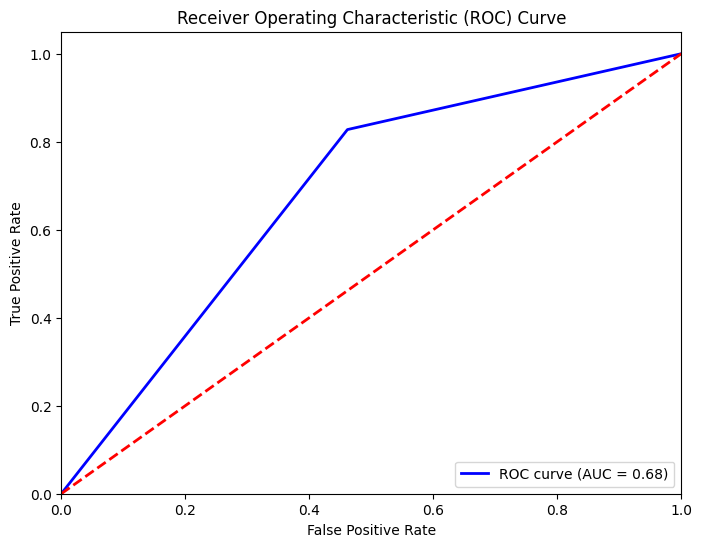

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_encoded)

# Compute AUC score
auc_score = roc_auc_score(y_test_encoded, y_pred_encoded)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
